### Lab Tasks
- In the dataframe creates in Lab 2 - Part b, set ``mpg`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``StandardScaler`` to scale feature set X. 

### Lab Questions
1. Train ``LinearRegression`` model on this dataset. What is the intercept of this model? (enter the value with 2 significant digits). 
2. Train ``Ridge`` on this dataset. Which value of $\alpha$ gives the best fit? (set ``random_state = 0``)
$$\alpha \in \{0.01, 0.1, 1, 10\}$$
3. Train ``Lasso`` on this dataset. Which value of $\alpha$ gives the best fit? (set ``random_state = 0``)
$$\alpha \in \{0.01, 0.1, 1, 10\}$$
4. In order to visualize ``KNeighborsRegressor``, we have used matplotlib to plot the regressor for ``n_neighbors`` in [1, 5, 10, 20]. Train the model only on one column ``horsepower`` in X_train. Which of the following is the plot for ``n_neighbors = 5``.
5. Train ``KNeighborsRegressor`` on ``X_train`` and ``y_train`` with ``n_neighbors = 5``. What can we say about this regressor? 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("auto.csv")
df = df.replace('?',np.nan )

In [101]:
### impute data for horspeower 
grouped_data = df[['cylinders','horsepower']].groupby('cylinders')

def impute_median(series):
    return series.fillna(series.median())

df['horsepower'] = grouped_data['horsepower'].transform(impute_median)

In [102]:
df.isna().any()  

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [103]:
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)

df = df.drop(['car name'],axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
model year      397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB


In [104]:
y= df['mpg']
X = df
X = X.drop('mpg',axis=1)

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
model year      397 non-null int64
origin          397 non-null int64
dtypes: float64(3), int64(4)
memory usage: 21.8 KB


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train_org,x_test_org,y_train,y_test=train_test_split(X,y,random_state=0)  ## org stands for the very original
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train_org)  ### you can fit and transform together 
X_test = scaler.transform(x_test_org)  

C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\obaid\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


# Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression


lreg = LinearRegression()
lreg.fit(X_train,y_train)
print(lreg.score(X_train,y_train))  
print(lreg.score(X_test,y_test))

0.8229291685615923
0.8072358928101977


In [112]:
lreg.intercept_

23.55824915824916

# Ridge 

In [113]:
### lets do ridge regression 

from sklearn.linear_model import Ridge

x_range =[0.01,0.1,1,10]  ## my alpha values

train_score_list = []
test_score_list = []

for alpha in x_range:
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)  ## takes in transformed data
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test,y_test))

In [114]:
print(train_score_list)
print(test_score_list)

[0.8229291495600686, 0.8229273027959076, 0.822772084833713, 0.8178147206473476]
[0.8072604331297489, 0.8074749975828447, 0.8090928865951014, 0.8085186677161755]


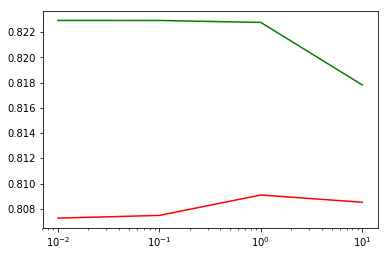

In [115]:
plt.plot(x_range,train_score_list,c='g',label = 'Train Score')
plt.plot(x_range,test_score_list,c='r',label = 'Test Score')
plt.xscale('log')

## Its obvious 1 gives the best value  , just look at the graphs 

# Lasso 

In [116]:
from sklearn.linear_model import Lasso

x_range =[0.01,0.1,1,10]  ## my alpha values

train_score_list = []
test_score_list = []

for alpha in x_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)  ## takes in transformed data
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test,y_test))


In [117]:
print(train_score_list)
print(test_score_list)

[0.8227545446485265, 0.8168261665682981, 0.7870546625145154, 0.0]
[0.8096073250571404, 0.8166942674964409, 0.7996109928675421, -0.0002488620793819063]


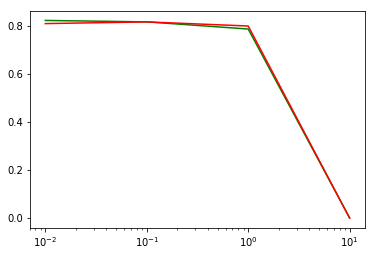

In [118]:
plt.plot(x_range,train_score_list,c='g',label = 'Train Score')
plt.plot(x_range,test_score_list,c='r',label = 'Test Score')
plt.xscale('log')

## Its obvious 0.1 gives the best value  , just look at the graphs 

# K N regressor

In [119]:
from sklearn.neighbors import KNeighborsRegressor
x_range = [1,5,10,20]
train_score_list = []  ## initialize array to hold train values
test_score_list = []  ## initilaize array to hold test values

for k in x_range:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train,y_train)
    train_score_list.append(knn.score(X_train,y_train))
    test_score_list.append(knn.score(X_test,y_test))

In [120]:
print(train_score_list)
print(test_score_list)

[1.0, 0.9125762700653507, 0.8788038254092065, 0.842289700214143]
[0.72468462567987, 0.8541684227012557, 0.8544450159466923, 0.8521196553663469]


# K N only with horspower

In [124]:
X_b = X_train[:,2].reshape(-1,1)
y_b = y_train[:]

In [125]:
myknn=  KNeighborsRegressor(5)
myknn.fit(X_b,y_b)


### only use one column 


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

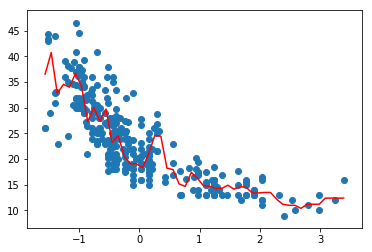

In [129]:
X_new = np.linspace(X_b.min(),X_b.max(),50).reshape(50,1)
y_predict = myknn.predict(X_new)

plt.plot(X_new,y_predict,c='r')
plt.scatter(X_b,y_b)

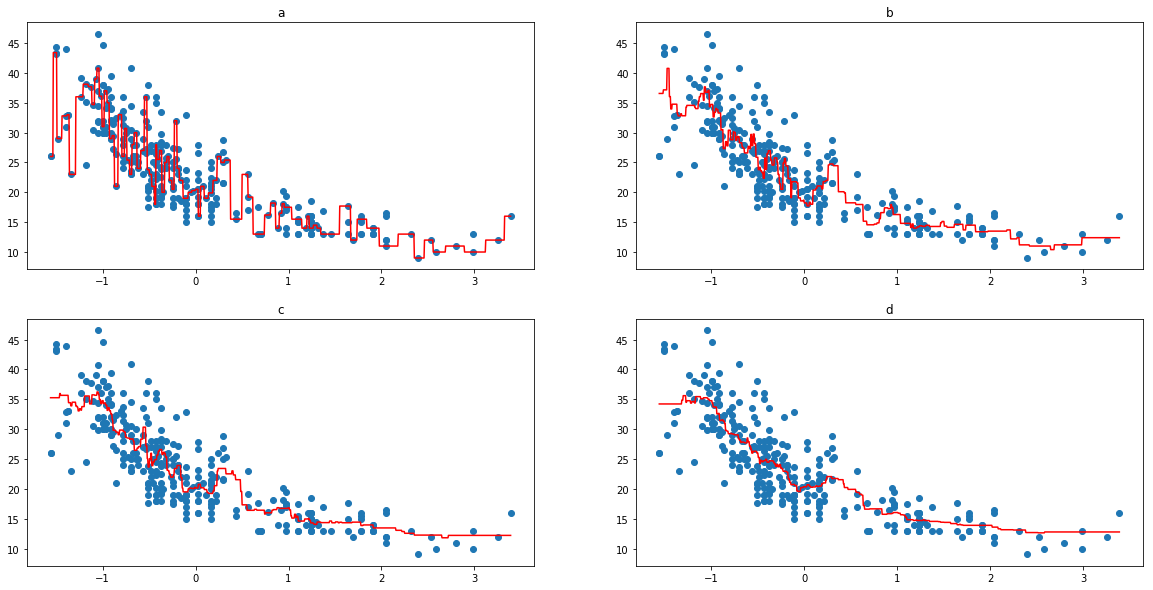

In [69]:
#Question 4: 